In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error # oluştuduğumuz modelin performansını ölçer
from sklearn.model_selection import train_test_split

In [71]:
import os
os.chdir(r"C:\Users\Excalibur\Desktop\VERİ BİLİMİ\Makine Öğrenmesi\verisetleri")

In [72]:
df = pd.read_csv("linear_model.csv")
df.head()

,x,y
0,82.583220,134.907414
1,73.922466,134.085180
2,34.887445,NaN
3,61.839983,114.530638
4,16.775940,31.376437


* x lerden yola çıkarak y leri tahmin etmeye çalışacağız. 
* Öncelikle veri setini düzenleyelim.

In [73]:
df.isnull().sum()

x    0
y    8
dtype: int64

* y değişkenin de 8 eleman var

In [74]:
# nan değerleri ortalama ile dolduralım
df.y.fillna(df.y.mean(), inplace=True)

In [75]:
df.isnull().sum()

x    0
y    0
dtype: int64

In [76]:
df.describe()

,x,y
count,100.000000,100.000000
mean,52.099330,87.915132
std,29.416763,45.150390
min,0.016737,-6.236295
25%,29.012087,52.047526
50%,55.255856,87.915132
75%,77.442040,126.556343
max,99.432294,166.164544


In [77]:
# Manuel olarak Normalizasyon (MinMaxScaller) yapalım 
df.x = (df.x - df.x.min()) / (df.x.max() - df.x.min())
df.y = (df.y - df.y.min()) / (df.y.max() - df.y.min())

In [46]:
"""from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
scaled_df = min_max_scaler.fit_transform(df)
df = pd.DataFrame(scaled_df)

df.head()"""

In [78]:
X = df.x
y = df.y

# X ve y yapıları Series yapısında. 
# Series yapıları index ve value den oluşuyor.
# Bu nedenle aşağıda value değerlerini aldık.

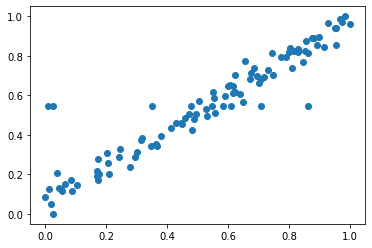

In [82]:
# x ve y arasındaki ilişki

plt.scatter(X.values, y.values);

Pozitif yönde doğrusal bi ilişki olduğunu gözlemleyebiliyoruz.

In [83]:
# MODEL KURMA
lineer_regresyon = LinearRegression()
lineer_regresyon.fit(X.values.reshape(-1,1), y.values.reshape(-1,1))
# X.values.reshape(-1,1) : verilermiz kaç satır olduğu önemli değil ama tek sütundan oluşmalı.
#lineer regresyon her bir değişkeni tek sütunda görmek ister.

LinearRegression()

In [84]:
lineer_regresyon.coef_

array([[0.83833805]])

In [85]:
lineer_regresyon.intercept_

array([0.10692427])

In [88]:
print("Kurulan regresyon modeli : Y = {} + {} * x".format(lineer_regresyon.intercept_[0].round(2),
                                                          lineer_regresyon.coef_[0][0].round(2)))

Kurulan regresyon modeli : Y = 0.11 + 0.84 * x


In [90]:
y_pred = lineer_regresyon.predict(X.values.reshape(-1,1))
y_pred # X e bağlı y tahminleri

array([[0.80317973],
       [0.7301465 ],
       [0.40097726],
       [0.62825897],
       [0.24824901],
       [0.10692427],
       [0.48167956],
       [0.19401828],
       [0.46742402],
       [0.28266017],
       [0.24869691],
       [0.11588219],
       [0.49158714],
       [0.86077015],
       [0.139522  ],
       [0.53048252],
       [0.7011594 ],
       [0.12219311],
       [0.64324244],
       [0.67287585],
       [0.67155314],
       [0.84532974],
       [0.62428219],
       [0.35883925],
       [0.50203532],
       [0.51548353],
       [0.90787633],
       [0.90445776],
       [0.4128963 ],
       [0.56749867],
       [0.50940091],
       [0.5224947 ],
       [0.60140052],
       [0.12644478],
       [0.25153861],
       [0.69566935],
       [0.70941502],
       [0.48216812],
       [0.16159497],
       [0.76977141],
       [0.57230426],
       [0.25491913],
       [0.15320187],
       [0.17806378],
       [0.84148073],
       [0.27685549],
       [0.62494433],
       [0.817

In [91]:
r2_score(y, y_pred)

0.8971708595884971

Modelimiz verileri %89 oranında açıklıyor. (Determinasyon katsayısı- R2)

In [93]:
df = pd.DataFrame({"y":y.values.flatten(), "y_pred":y_pred.flatten()})
df
# flatten() numpy modülüdür. Bütün verileri tek bir boyuta indirger düzleştirir.

,y,y_pred
0,0.818695,0.803180
1,0.813926,0.730146
2,0.546119,0.400977
3,0.700501,0.628259
4,0.218170,0.248249
...,...,...
95,0.812981,0.829807
96,0.771826,0.656422
97,0.327690,0.311982
98,0.875813,0.824890


Diğer Kullanacağımız Ölçütler:
1. **Mean Absolute Error (MAE):** Ortalama Mutlak Hata MAE = 1/n * toplam(y - y_tahmin)
2. **Mean Squared Error (MSE):** Ortalama Karesel Hata MSE = 1/n * toplam((y - y_tahmin)^2)
3. **Root Mean Squared Error (RMSE):** Ortalama Mutlak Hatanın Karekökü RMSE = Kök(1/n * toplam((y - y_tahmin)^2))

In [96]:
mean_squared_error(y, y_pred, squared=False)
# squared=False yapınca RMSE
# squared=True yapınca MSE yi veriyor

# sonucun küçük olmasını isteriz çünkü burada hatalar söz konusu

0.08355988368688008

In [ ]:
# oldukça küçük bir değer diyebiliriz. güzel bir sonuç elde ettik.

* Regresyonun grafiğini çizdirelim. 2 boyutlu düzlemde çalıştığımız için 2 nokta bize yeter.

In [97]:
b0 = lineer_regresyon.intercept_[0].round(2)
b1 = lineer_regresyon.coef_[0][0].round(2)

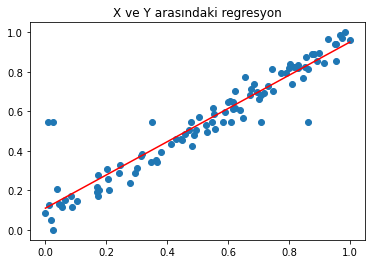

In [102]:
random_x  = np.array([0,1])
plt.plot(random_x, b0 + b1 * random_x , color = "red", label="regresyon")
plt.scatter(X.values, y.values)
plt.legend
plt.title("X ve Y arasındaki regresyon");

Demek ki en uygun çizgimiz buymuş. Bundan sonra bir değer tahmin etmek istiyorsam bu çizginin üzerinde bir yer tahmin edeceğim. Tabi sapmalarım olacaktır. Sapmalar ne kadar az olursa regresyon modelim o kadar kaliteli demektir.